# SVD

In [5]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg as la

### Problem 1

In [77]:
def p_1(A, tol=0.00001):
    herm = A.conj().T
    eigs, vecs = la.eig(herm @ A) #find eigenvalues and vectors
    
    sigma =  np.sqrt(eigs).real #calc singular values
    place = np.argsort(-sigma) #find places to sort singular values
    sigma =  sigma[place] #sort singular values
    vecs = vecs[place, :]
    r = (sigma > tol).sum()
    sigma_1 = sigma[0:r]
    vecs_1 = vecs[:, 0:r]
    u_1 = A @ vecs_1 / sigma_1
    return u_1, sigma_1, vecs_1.conj().T


In [79]:
A = np.random.random((3, 3))
U, s, Vh = la.svd(A, full_matrices=False)
myu, mys, myV = p_1(A)
print(mys)
print(s)

[1.84427136 0.50732451 0.03538984]
[1.84427136 0.50732451 0.03538984]


### Problem 2

In [34]:
def p_2(A):
    theta = np.linspace(0, 2*np.pi, 200)
    cos_t, sin_t = np.cos(theta), np.sin(theta)
    
    S = np.empty((2, 200))
    S[0, :] = cos_t
    S[1, :] = sin_t
    
    E  = np.array([[1,0,0],[0,0,1]])
    
    U, s, Vh = la.svd(A)
    sigma = np.diag(s)
    
    plt.style.use('seaborn-darkgrid')
    plt.figure(figsize=(10, 10))
    
    plt.subplot(2, 2, 1)
    plt.plot(S[0,:], S[1,:], 'b-')
    plt.plot(E[0,:], E[1,:], 'r-')
    plt.axis('equal')
    
    plt.subplot(2, 2, 2)
    plt.plot((Vh@S)[0,:], (Vh@S)[1,:], 'b-')
    plt.plot((Vh@E)[0,:], (Vh@E)[1,:], 'r-')
    plt.axis('equal')
    
    plt.subplot(2, 2, 3)
    plt.plot((sigma@Vh@S)[0,:], (sigma@Vh@S)[1,:], 'b-')
    plt.plot((sigma@Vh@E)[0,:], (sigma@Vh@E)[1,:], 'r-')
    plt.axis('equal')
    
    plt.subplot(2, 2, 4)
    plt.plot((U@sigma@Vh@S)[0,:], (U@sigma@Vh@S)[1,:], 'b-')
    plt.plot((U@sigma@Vh@E)[0,:], (U@sigma@Vh@E)[1,:], 'r-')
    plt.axis('equal')
    
    plt.show()
    return


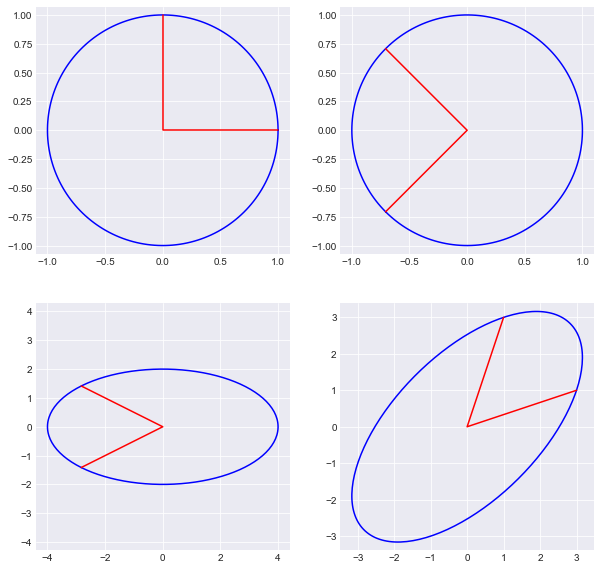

In [35]:
A = np.array([[3, 1],[1, 3]])
p_2(A)

### Problem 3

In [56]:
def p_3(A, s):
    
    if s > np.linalg.matrix_rank(A):
        raise ValueError("s exceeds rank of A")
    
    U, S, Vh = la.svd(A, full_matrices = False)
    U_1 = np.delete(U, np.s_[s:], 1)
    
    S_1 = S[0:s]
    sigma_1 = np.diag(S_1)
    
    V_1 = np.delete(Vh, np.s_[s:], 0)
    
    A_s = U_1 @ sigma_1 @ V_1
    
    entries = S_1.size + U_1.size + V_1.size
    
    return A_s, entries

### Problem 4

In [62]:
def p_4(A, epsilon = 0.01):
    U, S, Vh = la.svd(A, full_matrices = False)
    
    if epsilon < S.min():
        raise ValueError('epsilon is too small')
        
    r = (S > epsilon).sum()
    s = r
    
    A_s, entries = p_3(A, s)
    return A_s, entries

In [65]:
test = np.random.random((5,5))
la.norm(test - p_4(test)[0])

2.9641749522485373e-15

### Problem 5

In [89]:
def p_5(name, s):
    image = plt.imread(name) / 255
    
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title('Full image')
    
    if image.ndim == 2: #i.e. image is gray-scale
        approx, entries = p_3(image, s)
        approx = np.clip(approx, 0, 1)
        plt.subplot(1, 2, 2)
        plt.imshow(approx, cmap='gray')
        plt.axis('off')
        plt.title('Approximated image')

    elif image.ndim == 3:
        approx_r, ent_r = p_3(image[:,:,0], s)
        approx_b, ent_b = p_3(image[:,:,1], s)
        approx_g, ent_g = p_3(image[:,:,2], s)
        
        #print(image.size - (ent_r + ent_b + ent_g))
        
        entries = ent_r + ent_b + ent_g
        approx = np.dstack((approx_r, approx_b, approx_g))
        approx = np.clip(approx, 0, 1)
        
        plt.subplot(1, 2, 2)
        plt.imshow(approx)
        plt.axis('off')
        plt.title('Approximated image')
    
    else:
        print('weird dimensions')
    
    plt.show()
    return

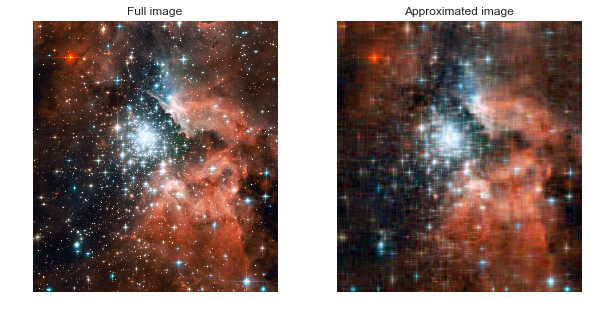

In [90]:
p_5('hubble.jpg', 20)
